<a href="https://colab.research.google.com/github/camilaandreasbs/Tareas/blob/main/Copia_de_tarea2_perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

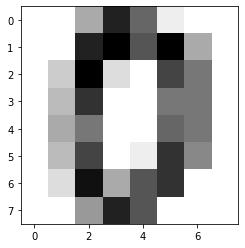

In [ ]:
# Programando un perceptron:

#Importamos librerías
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import random

# Importamos los datos
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
X, y = load_digits(return_X_y=True)
plt.imshow(X[0].reshape(8,8), cmap=plt.cm.gray_r, interpolation="nearest")

# Creamos un conjunto de testeo y entrenamiento
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

El dataset contiene 1797 filas, correspondientes cada una a un dígito entre uno y nueve. Cada fila contiente 64 columnas las cuales corresponden a cada uno de los pixeles que conforman las imágenes de 8x8. No se observan valores perdidos y los datos corresponden al tipo float 64. Donde el valor de cada uno de estos números corresponden al valor de la intensidad del pixel. El valor míínimo de la intensidad del pixel corresponde a 0 y el máximo a 16. Además en la tabla inferior se pueden observar los valores promedio para cada uno de los pixeles de la imágen. 

In [ ]:
# Exploración del dataset

X_df = pd.DataFrame(X)
print(X_df.info())
print(X_df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1797 entries, 0 to 1796
Data columns (total 64 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       1797 non-null   float64
 1   1       1797 non-null   float64
 2   2       1797 non-null   float64
 3   3       1797 non-null   float64
 4   4       1797 non-null   float64
 5   5       1797 non-null   float64
 6   6       1797 non-null   float64
 7   7       1797 non-null   float64
 8   8       1797 non-null   float64
 9   9       1797 non-null   float64
 10  10      1797 non-null   float64
 11  11      1797 non-null   float64
 12  12      1797 non-null   float64
 13  13      1797 non-null   float64
 14  14      1797 non-null   float64
 15  15      1797 non-null   float64
 16  16      1797 non-null   float64
 17  17      1797 non-null   float64
 18  18      1797 non-null   float64
 19  19      1797 non-null   float64
 20  20      1797 non-null   float64
 21  21      1797 non-null   float64
 22  

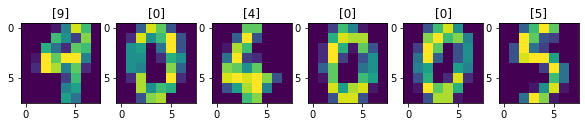

In [ ]:
def frontal_plots(X):
  # La función frontal plot recibe un array de numpy que corresponde a los datos
  # de la base de datos MNIST y plotea 6 números al azar, junto a su clase.

  fig, ax = plt.subplots(1,6, figsize=(10,10))
  for i in range(6):
    rand = np.random.randint(1000, size = 1)
    ax[i].imshow(X[rand].reshape(8,8))
    ax[i].title.set_text(str(y[rand]))
frontal_plots(X)

In [ ]:
# Creando la clase perceptron

class Perceptron():
  # La clase perceptron recibe como argumento dig, correspondiente al dígito
  # a clasificar; lr, la tasa de aprendizaje; max_iter, cantidad máxima de iteraciones
  # y tol, criterio de detención del algortimo.  

  def __init__(self, dig, lr, max_iter, tol):
    # Comenzamos inicializando el vector de pesos como ceros. 
    self.dig = dig
    self.lr = lr
    self.max_iter = max_iter
    self.tol = tol
    self.weights = np.array([random.randint(-16, 16) for x in range(64)])
    self.bias = np.random.randint(-16, 16)
    self.t = 1 # Numero de iteraciones
    self.accuracy = 0
    
    # Transformamos los dígitos para una clasificacióón binaria.
    new_y = []
    for i in range(len(y)):
      if y[i] == self.dig:
        i = 1
        new_y.append(i)
      else:
        i = 0
        new_y.append(i)
    self.new_y = new_y
    

  # Definimos los métodos de la clase perceptrón

  def predict(self, X):
    # Este método recibe un conjunto de testeo y predice las clase correspondientes
    # Aqui hay que transformar los targets en categorías binarias
    
    # Calculamos la activación para cada uno de los digitos
    activations = []
    for i in range((X.shape[0])):
      activation = np.dot(X[i,:], self.weights.T) + self.bias
      activations.append(activation)

    # Predecimos según el signo de la activación 
    prediction = []
    for activation in activations:
      pred = 1.0 if activation >= 0.0 else 0.0
      prediction.append(pred)
    

    # Retornamos la lista con los valores de la predicción 
    return prediction

  def score(self, X, y):
    # Cálcula el accuracy obtenido al clasificar el conjunto de testeo X, 
    # con su respectivo vector target y.

    # Inicializamos el valor de los aciertos en cero
    score = 0
    
    # Predecimos el dataset ingresado
    prediction = self.predict(X)

    # Calculamos si identifica correctamente 
    for i in range(len(prediction)):
      if prediction[i] == self.new_y[i]:
        score += 1 
    for i in range(len(prediction)):
      print("Expected={0:2}, Predicted={1:2}".format(self.new_y[i], prediction[i]))

    # Calculamos el accuracy
    accuracy = (score/ float(len(prediction)) * 100)
    self.accuracy = accuracy
    return print(accuracy)
  
  # Obtener el accuracy obtenido en laultima clasificación
  def get_accuracy(self):
    accuracy = self.accuracy
    return print(accuracy)

  # Ajuste del modelo
  def fit(self, X, y):

    # Este método debe realizar el entrenamiento del modelo, para esto
    # recibe como inputs un conjunto de entrenamineto X, con su respectivo
    # vector target y.

    for epoch in range(self.max_iter):  
      sum_error = 0.0
      weights = self.weights

      # Estos son los pesos iniciales y permite ver como cambian según la época
      print(weights) 
      
      prediction = self.predict(X)
      for row, i in zip(X, range(len(X))) :
        error = new_y[i] - prediction[i]
        sum_error += error ** 2

        # Este es el intercepto
        self.bias = self.bias + self.lr * error 
        
        # Esto es el SGD
        for j in range(len(row)-1):  
          self.weights[j + 1] = self.weights[j + 1] + self.lr * error * row[j] 
          # print(weights) #Si borras el gato, puedes ver como se actualiza W. 

          # Aca se incluye la tolerancia 
          if sum_error < self.tol:
            break
    print("epoch={0:3}, lrate={1:3}, error={2:3}".format(epoch, self.lr, sum_error))      
    return self.weights 

Acá hay un tema con el desbalance de clases, esto queda patente cuando el clasificador clasifica todo como 0, y obtiene un accuracy del 90%. No sé si podemos manejar eso. 

In [ ]:
# Recomiendo probar con LR entre 0.0001 a 1
# No se cuanto es el número de épocas optimo, pero con 5 anda de pana
# Tampoco la tolerancia, parece que nunca la alcanza en realidad.

a = Perceptron(8,0.001,3,10)
a.fit(X_train,y_train)
a.predict(X_test)
a.score(X_test,y_test)

[  8 -10 -13   3   5 -10 -12   8  -8  -5 -16  -6  13  15 -16  13   0   3
  14  -5   2  -9 -12   9   2   3  10 -13 -15   5 -10   0  10   9  15 -16
   0   6 -10   6  -8  -8  -3  -5 -12   6  14  12   8 -13 -16  16  -9  -6
   6  -8  -9  15   7  -1  -2   4  -4  -9]
[  8 -10   0   0   0   0   0   0  -5  -5   0   0   0   0   0   0   0   3
   0   0   0   0   0   0   2   2   0   0   0   0   0   0  10   9   0   0
   0   0   0   0  -8  -8   0   0   0   0   0   0   0 -13   0   0   0   0
   0   0  -2  15   2   0   0   0   0   0]
[  8 -10   0   0   0   0   0   0  -5  -5   0   0   0   0   0   0   0   1
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   8   9   0   0
   0   0   0   0  -8  -8   0   0   0   0   0   0   0 -13   0   0   0   0
   0   0  -2  15   0   0   0   0   0   0]
epoch=  2, lrate=0.001, error=771.0
Expected= 0, Predicted=1.0
Expected= 0, Predicted=0.0
Expected= 0, Predicted=0.0
Expected= 0, Predicted=1.0
Expected= 0, Predicted=0.0
Expected= 0, Predicted=1.0
Expected= 0, Predic

In [ ]:
a.get_accuracy()

43.333333333333336


Una vez creada la clase perceptron, mostraremos el renidmiento del modelo para distintos dígitos, valores de learning rate y tolerancias, separando en training y test set.  

In [ ]:
class multi_perceptron() :
# Recibe como input el conjunto de entrenamiento y de testeo
# la tasa de aprendizaje, las epocas y la tolerancia.
# Instancia 10 perceptrones, entrenados para reconocer cada uno un número
# de uno a diez

  # Definimos los inicializadores
  def __init__(self, lr ,epochs,tol):
    self.lr = lr
    self.epochs = epochs
    self.tol = tol
    self.weights = []

    # Creamos un diccionario con los 10 perceptrones instanciados
    self.perceptrons = {}
    for i in range(10):
      self.perceptrons["p"+str(i)] = Perceptron(i, self.lr,self.epochs,self.tol)
    self.perceptrons = self.perceptrons

  # Con este método ajusto los 10 perceptrones
  def fit(self, X_train, y_train):
    weights = []
    for  i in range (10):
      weight = self.perceptrons.get("p"+str(i)).fit(X_train, y_train)
      weights.append(weight)
    self.weights = weights
    return self.weights
    
  # AQUI TENGO DUDAS, ME DA LA IMPRESION QUE ESTO NO ESTA FUNCIONANDO BIEN. 
  def predict(self, X_test):
    predictions = []
    for i in range((X_test.shape[0])):
      activations = []
      for j in range(10):
        activation = np.dot(self.weights[j].T, X_test[i,:]) + self.perceptrons.get("p"+str(j)).bias
        activations.append(activation)
      max_activation = max(activations)
      max_pos = activations.index(max_activation)

      # Entrega la posición del máximo valor, los cuales van de 0 a 9
      # en dicho orden.
      predictions.append(max_pos) 
    
    return predictions

  def score(self, X, y):
    # Cálcula el accuracy obtenido al clasificar el conjunto de testeo X, 
    # con su respectivo vector target y.

    # Inicializamos el valor de los aciertos en cero
    score = 0
    
    # Predecimos el dataset ingresado
    prediction = self.predict(X_test)

    # Transformamos el array de targets a una lista
    #Esto es necesario más adelante
    y = list(y)

    # Calculamos si identifica correctamente 
    for i in range(len(prediction)):
      if prediction[i] == y[i]:
        score += 1 
    for i in range(len(prediction)):
      print("Expected={0:2}, Predicted={1:2}".format(y[i], prediction[i]))

    # Calculamos el accuracy
    accuracy = (score/ float(len(prediction)) * 100)
    self.accuracy = accuracy
    return print(accuracy)
   

Ahora realizaremos un enfoque One vs All, para construir 10 clasificadores binarios para cada uno de los dígitos, para el cuál elegiremos aquel que entrege el valor de output más grande.     

Aca vamos a probar nuestra clase multi_perceptron basado en una estrategia de uno contra todos. El cóódigo de abajo, clasifica con hartoo error, pero al parecer estáá funcionando, ahora hay que ver como ser capaces de integrarlo al llamar a la clase multi_perceptron. 

In [ ]:
# Multi perceptron recibe tres inputs, tasa de aprendizaje, numero de épocas y tolerancia.
# Dado un conjunto de entrenamiento, predice el número en base a los pixeles de la imagen.

a = multi_perceptron(0.00000001,5,50).fit(X_train, y_train)

[ 15   5  -8  13  -8 -13   3  -6   2  -6 -11  13   9   2  -3  -6  -3   8
  -8   6   4 -14  -2   0 -16   6   7   3 -15 -16  -2   6  -2   2   9  12
   5  10  12  -3  -7   5   2  10   8 -11  -4   8  -5   2  14 -12 -13  -1
 -11  16   8 -10  -4  -8   5 -13   2   1]
[ 15   5   0   0   0   0   0   0   0  -6   0   0   0   0   0   0  -1   6
   0   0   0   0   0   0 -16   4   0   0   0   0   0   0  -2   2   0   0
   0   0   0   0  -7   0   0   0   0   0   0   0  -5   0   0   0   0   0
   0   0   0 -10   0   0   0   0   0   0]
[ 15   5   0   0   0   0   0   0   0  -6   0   0   0   0   0   0  -1   2
   0   0   0   0   0   0 -16   2   0   0   0   0   0   0  -2   2   0   0
   0   0   0   0  -7   0   0   0   0   0   0   0  -5   0   0   0   0   0
   0   0   0 -10   0   0   0   0   0   0]
[ 15   5   0   0   0   0   0   0   0  -6   0   0   0   0   0   0  -1   0
   0   0   0   0   0   0 -16   0   0   0   0   0   0   0  -2   2   0   0
   0   0   0   0  -7   0   0   0   0   0   0   0  -5   0   0   0   0   

In [ ]:
predictions = []
for i in range((X_test.shape[0])):
  activations = []
  for j in range(10):
    activation = np.dot(a[j].T, X_test[i,:])
    activations.append(activation)
  max_activation = max(activations)
  max_pos = activations.index(max_activation)

    # Entrega la posición del máximo valor, los cuales van de 0 a 9
    # en dicho orden.
  predictions.append(max_pos) 


predictions

[0,
 2,
 9,
 1,
 2,
 2,
 2,
 0,
 1,
 2,
 0,
 1,
 1,
 0,
 1,
 9,
 6,
 7,
 7,
 2,
 1,
 8,
 2,
 7,
 2,
 0,
 7,
 2,
 1,
 3,
 0,
 0,
 0,
 0,
 1,
 1,
 6,
 7,
 7,
 7,
 0,
 0,
 0,
 9,
 7,
 2,
 8,
 0,
 7,
 2,
 1,
 0,
 2,
 2,
 1,
 7,
 0,
 0,
 1,
 2,
 0,
 7,
 2,
 2,
 1,
 2,
 5,
 7,
 1,
 1,
 2,
 0,
 1,
 1,
 7,
 7,
 5,
 2,
 0,
 2,
 2,
 1,
 8,
 6,
 2,
 0,
 0,
 1,
 7,
 6,
 2,
 9,
 9,
 9,
 2,
 0,
 2,
 7,
 1,
 1,
 7,
 9,
 1,
 9,
 1,
 6,
 1,
 1,
 1,
 6,
 0,
 7,
 1,
 1,
 7,
 9,
 0,
 9,
 5,
 1,
 8,
 7,
 2,
 7,
 2,
 6,
 4,
 5,
 2,
 1,
 7,
 2,
 2,
 2,
 1,
 0,
 7,
 1,
 0,
 5,
 1,
 6,
 1,
 1,
 2,
 2,
 1,
 0,
 1,
 2,
 2,
 1,
 1,
 1,
 0,
 1,
 2,
 8,
 0,
 6,
 7,
 2,
 2,
 0,
 7,
 1,
 9,
 1,
 2,
 2,
 2,
 6,
 7,
 6,
 0,
 8,
 0,
 0,
 8,
 9,
 9,
 2,
 0,
 0,
 6,
 9,
 0,
 2,
 7,
 2,
 2,
 1,
 7,
 2,
 1,
 2,
 4,
 1,
 1,
 0,
 2,
 2,
 2,
 0,
 0,
 2,
 1,
 0,
 0,
 2,
 0,
 7,
 2,
 7,
 9,
 2,
 7,
 1,
 1,
 1,
 2,
 7,
 1,
 1,
 1,
 8,
 7,
 7,
 0,
 8,
 6,
 7,
 9,
 2,
 1,
 0,
 0,
 7,
 1,
 0,
 0,
 2,
 1,
 0,
 0,
 0,
 6,
 0,
 2,
 2,


In [ ]:
score = 0
for i in range(len(predictions)):
  if predictions[i] == y_test[i]:
      score += 1 
for i in range(len(predictions)):
    print("Expected={0:2}, Predicted={1:2}".format(y_test[i], predictions[i]))
# Calculamos el accuracy
accuracy = (score/ float(len(predictions)) * 100)
print(accuracy)

Expected= 6, Predicted= 0
Expected= 9, Predicted= 2
Expected= 3, Predicted= 9
Expected= 7, Predicted= 1
Expected= 2, Predicted= 2
Expected= 1, Predicted= 2
Expected= 5, Predicted= 2
Expected= 2, Predicted= 0
Expected= 5, Predicted= 1
Expected= 2, Predicted= 2
Expected= 1, Predicted= 0
Expected= 9, Predicted= 1
Expected= 4, Predicted= 1
Expected= 0, Predicted= 0
Expected= 4, Predicted= 1
Expected= 2, Predicted= 9
Expected= 3, Predicted= 6
Expected= 7, Predicted= 7
Expected= 8, Predicted= 7
Expected= 8, Predicted= 2
Expected= 4, Predicted= 1
Expected= 3, Predicted= 8
Expected= 9, Predicted= 2
Expected= 7, Predicted= 7
Expected= 5, Predicted= 2
Expected= 6, Predicted= 0
Expected= 3, Predicted= 7
Expected= 5, Predicted= 2
Expected= 6, Predicted= 1
Expected= 3, Predicted= 3
Expected= 4, Predicted= 0
Expected= 9, Predicted= 0
Expected= 1, Predicted= 0
Expected= 4, Predicted= 0
Expected= 4, Predicted= 1
Expected= 6, Predicted= 1
Expected= 9, Predicted= 6
Expected= 4, Predicted= 7
Expected= 7,